# **Práctica 13: Pronóstico (Árboles de decisión y Bosques Aleatorios)**

Nombre: Monroy Mendoza Angel Damian

No. Cuenta: 316040707

Email: adamianmm@gmail.com

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer un pronóstico del precio de las acciones a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
!pip install yfinance
#!pip install googlefinance

In [3]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline                # Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [4]:
# Para CEMEX
DataCX = yf.Ticker('CX')

In [5]:
CXHist = DataCX.history(start = '2019-1-1', end = '2023-05-16', interval='1d')
CXHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,4.686156,4.922930,4.686156,4.903199,4172900,0.0,0
2019-01-03 00:00:00-05:00,4.883468,4.883468,4.755215,4.794678,4016300,0.0,0
2019-01-04 00:00:00-05:00,4.844005,4.903199,4.794677,4.844005,7477600,0.0,0
2019-01-07 00:00:00-05:00,4.893333,5.041317,4.814409,5.001855,4678700,0.0,0
2019-01-08 00:00:00-05:00,5.051183,5.139973,5.011720,5.139973,7033700,0.0,0
...,...,...,...,...,...,...,...
2023-05-09 00:00:00-04:00,6.500000,6.770000,6.500000,6.740000,6918900,0.0,0
2023-05-10 00:00:00-04:00,6.820000,6.850000,6.590000,6.630000,4169400,0.0,0
2023-05-11 00:00:00-04:00,6.570000,6.700000,6.490000,6.660000,6550100,0.0,0


In [16]:
lista = list(CXHist.shape)
lista

[1100, 7]

Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

### **Descripción de la estructura de los datos**

Se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos. Se observa que los datos son numéricos (flotante y entero).

In [9]:
CXHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1100 entries, 2019-01-02 00:00:00-05:00 to 2023-05-15 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1100 non-null   float64
 1   High          1100 non-null   float64
 2   Low           1100 non-null   float64
 3   Close         1100 non-null   float64
 4   Volume        1100 non-null   int64  
 5   Dividends     1100 non-null   float64
 6   Stock Splits  1100 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 68.8 KB


In [10]:
CXHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1100.000000,1100.000000,1100.000000,1100.000000,1.100000e+03,1100.000000,1100.0
mean,4.860570,4.951115,4.770512,4.860024,7.689360e+06,0.000045,0.0
std,1.607927,1.626200,1.585193,1.605152,4.478840e+06,0.001508,0.0
min,1.740000,1.790000,1.550000,1.630000,1.050400e+06,0.000000,0.0
25%,3.789597,3.870000,3.736794,3.800000,4.660325e+06,0.000000,0.0
50%,4.479489,4.583750,4.419825,4.494355,6.552100e+06,0.000000,0.0
75%,5.932500,6.055000,5.842500,5.980000,9.596175e+06,0.000000,0.0
max,8.890000,9.090000,8.600000,8.890000,3.608860e+07,0.050000,0.0


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los precios de las acciones**

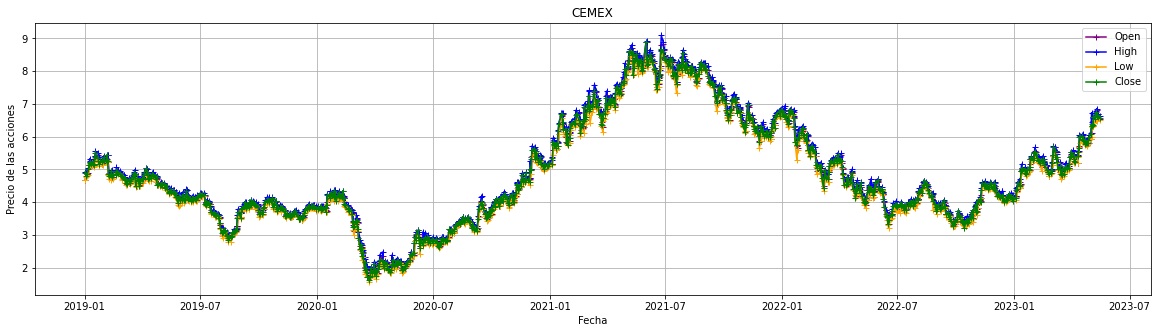

In [11]:
plt.figure(figsize=(20, 5))
plt.plot(CXHist['Open'], color='purple', marker='+', label='Open')
plt.plot(CXHist['High'], color='blue', marker='+', label='High')
plt.plot(CXHist['Low'], color='orange', marker='+', label='Low')
plt.plot(CXHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('CEMEX')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
MDatos = CXHist.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
MDatos

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-05:00,4.686156,4.922930,4.686156,4.903199
2019-01-03 00:00:00-05:00,4.883468,4.883468,4.755215,4.794678
2019-01-04 00:00:00-05:00,4.844005,4.903199,4.794677,4.844005
2019-01-07 00:00:00-05:00,4.893333,5.041317,4.814409,5.001855
2019-01-08 00:00:00-05:00,5.051183,5.139973,5.011720,5.139973
...,...,...,...,...
2023-05-09 00:00:00-04:00,6.500000,6.770000,6.500000,6.740000
2023-05-10 00:00:00-04:00,6.820000,6.850000,6.590000,6.630000
2023-05-11 00:00:00-04:00,6.570000,6.700000,6.490000,6.660000


In [13]:
# En caso de tener valores nulos
MDatos = MDatos.dropna()
MDatos

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-05:00,4.686156,4.922930,4.686156,4.903199
2019-01-03 00:00:00-05:00,4.883468,4.883468,4.755215,4.794678
2019-01-04 00:00:00-05:00,4.844005,4.903199,4.794677,4.844005
2019-01-07 00:00:00-05:00,4.893333,5.041317,4.814409,5.001855
2019-01-08 00:00:00-05:00,5.051183,5.139973,5.011720,5.139973
...,...,...,...,...
2023-05-09 00:00:00-04:00,6.500000,6.770000,6.500000,6.740000
2023-05-10 00:00:00-04:00,6.820000,6.850000,6.590000,6.630000
2023-05-11 00:00:00-04:00,6.570000,6.700000,6.490000,6.660000


# Aplicación del algoritmo - Árbol de Decisión

## Modelo 1

In [14]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [15]:
X = np.array(MDatos[['Open',
                     'High',
                     'Low']])
pd.DataFrame(X)

,0,1,2
0,4.686156,4.922930,4.686156
1,4.883468,4.883468,4.755215
2,4.844005,4.903199,4.794677
3,4.893333,5.041317,4.814409
4,5.051183,5.139973,5.011720
...,...,...,...
1095,6.500000,6.770000,6.500000
1096,6.820000,6.850000,6.590000
1097,6.570000,6.700000,6.490000
1098,6.680000,6.680000,6.580000


In [16]:
Y = np.array(MDatos[['Close']])
pd.DataFrame(Y)

,0
0,4.903199
1,4.794678
2,4.844005
3,5.001855
4,5.139973
...,...
1095,6.740000
1096,6.630000
1097,6.660000
1098,6.610000


### Se hace la división de los datos

In [17]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [18]:
pd.DataFrame(X_test)

,0,1,2
0,3.14,3.19,3.06
1,4.64,4.70,4.41
2,4.61,4.70,4.56
3,8.12,8.24,8.08
4,4.14,4.17,4.06
...,...,...,...
215,7.61,7.66,7.33
216,8.15,8.24,8.09
217,8.08,8.24,8.04
218,6.30,6.58,6.13


### Se entrena el modelo

In [19]:
PronosticoAD = DecisionTreeRegressor(max_depth=9, min_samples_split=8, min_samples_leaf=4, random_state=0)
PronosticoAD.fit(X_train, Y_train)

#PronosticoAD = DecisionTreeRegressor(random_state=0)
#PronosticoAD.fit(X_train, Y_train)



DecisionTreeRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=8,
                      random_state=0)

In [20]:
#Se genera el pronóstico
Y_Pronostico = PronosticoAD.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,3.154247
1,4.427278
2,4.647962
3,8.276667
4,4.117021
...,...
215,7.300000
216,8.276667
217,8.276667
218,6.420000


In [21]:
Valores = pd.DataFrame(Y_test, Y_Pronostico)
Valores

,0
3.154247,3.09
4.427278,4.46
4.647962,4.62
8.276667,8.20
4.117021,4.13
...,...
7.300000,7.62
8.276667,8.10
8.276667,8.23
6.420000,6.56


In [22]:
r2_score(Y_test, Y_Pronostico)

0.9968185203581346

In [23]:
print('Criterio: \n', PronosticoAD.criterion)
print('Importancia variables: \n', PronosticoAD.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_Pronostico))


Criterio: 
 squared_error
Importancia variables: 
 [2.79475071e-04 9.18039323e-01 8.16812021e-02]
MAE: 0.0658
MSE: 0.0078
RMSE: 0.0883
Score: 0.9968


#### **Conformación del modelo de pronóstico**

* Se tiene un Score de 0.9968, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.6% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 0.0078 y 0.083 unidades del valor real, esto es, MSE y RMSE, respectivamente.

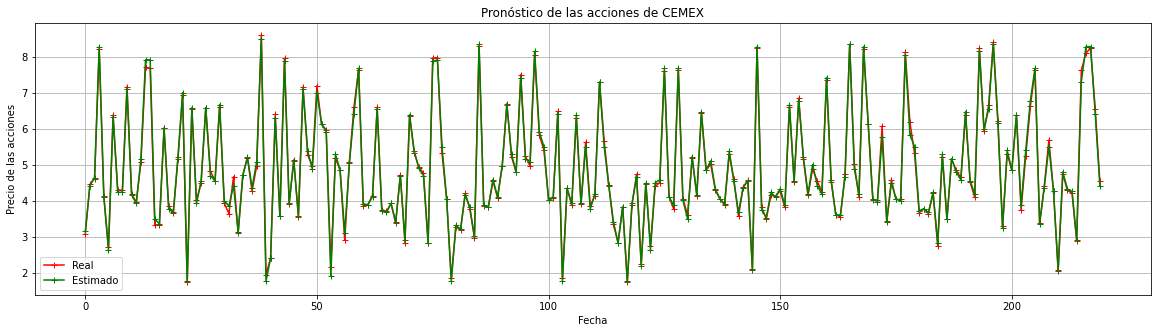

In [24]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='red', marker='+', label='Real')
plt.plot(Y_Pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de CEMEX')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
Importancia = pd.DataFrame({'Variable': list(MDatos[['Open', 'High', 'Low']]),
                            'Importancia': PronosticoAD.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
1,High,0.918039
2,Low,0.081681
0,Open,0.000279


### **Conformación del árbol**

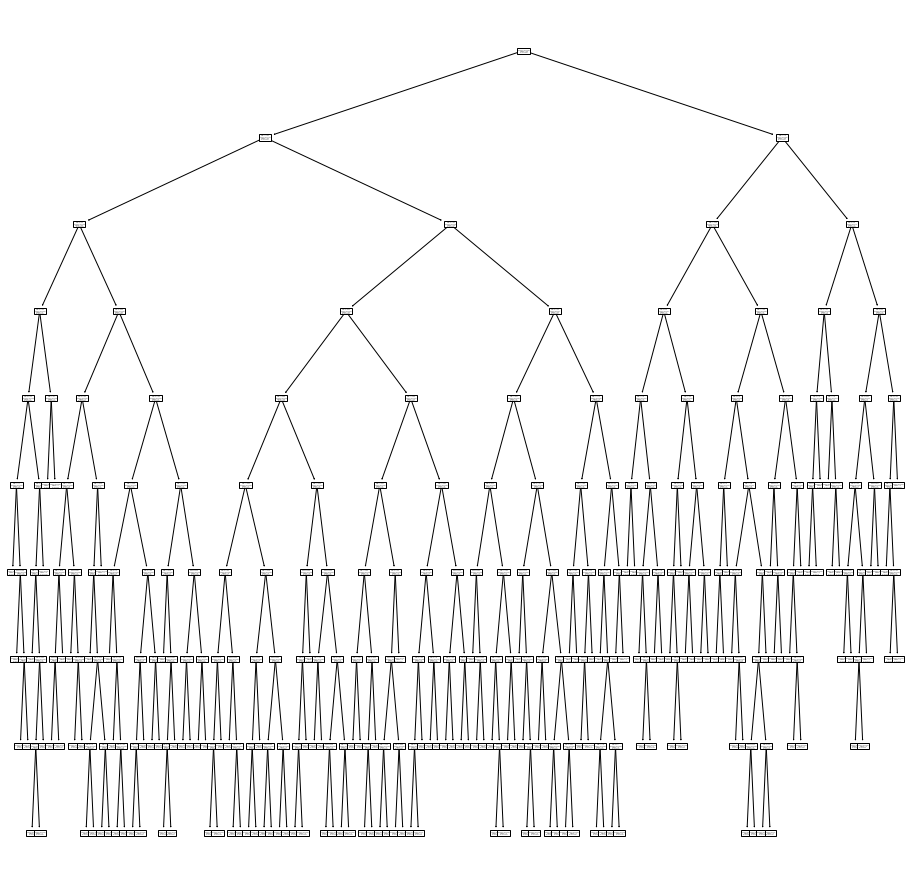

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(PronosticoAD, feature_names = ['Open', 'High', 'Low'])
plt.show()

In [27]:
from sklearn.tree import export_text
Reporte = export_text(PronosticoAD, feature_names = ['Open', 'High', 'Low'])
print(Reporte)

|--- High <= 5.55
|   |--- High <= 3.79
|   |   |--- Low <= 2.67
|   |   |   |--- Low <= 2.21
|   |   |   |   |--- Low <= 1.95
|   |   |   |   |   |--- High <= 1.97
|   |   |   |   |   |   |--- value: [1.77]
|   |   |   |   |   |--- High >  1.97
|   |   |   |   |   |   |--- Open <= 1.91
|   |   |   |   |   |   |   |--- value: [1.98]
|   |   |   |   |   |   |--- Open >  1.91
|   |   |   |   |   |   |   |--- Low <= 1.89
|   |   |   |   |   |   |   |   |--- value: [1.91]
|   |   |   |   |   |   |   |--- Low >  1.89
|   |   |   |   |   |   |   |   |--- value: [1.95]
|   |   |   |   |--- Low >  1.95
|   |   |   |   |   |--- Low <= 2.12
|   |   |   |   |   |   |--- High <= 2.12
|   |   |   |   |   |   |   |--- value: [2.02]
|   |   |   |   |   |   |--- High >  2.12
|   |   |   |   |   |   |   |--- Low <= 2.08
|   |   |   |   |   |   |   |   |--- Open <= 2.07
|   |   |   |   |   |   |   |   |   |--- value: [2.13]
|   |   |   |   |   |   |   |   |--- Open >  2.07
|   |   |   |   |   |   |   | 

### **Nuevos pronósticos**

In [28]:
PrecioAccion = pd.DataFrame({'Open': [6.55],
                             'High': [6.64], 
                             'Low': [6.5]})
PronosticoAD.predict(PrecioAccion)

C:\Users\Principal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([6.58749998])

## Modelo 2

In [29]:
MDatos = CXHist.drop(columns = ['Dividends', 'Stock Splits'])
X_AD_M2 = np.array(MDatos[['Open',
                     'High',
                     'Low',
                    'Volume']])
Y_AD_M2 = np.array(MDatos[['Close']])

In [30]:
X_train_AD_M2, X_test_AD_M2, Y_train_AD_M2, Y_test_AD_M2 = model_selection.train_test_split(X_AD_M2, Y_AD_M2, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [31]:
PronosticoAD_M2 = DecisionTreeRegressor(max_depth=9, min_samples_split=8, min_samples_leaf=4, random_state=0)
PronosticoAD_M2.fit(X_train_AD_M2, Y_train_AD_M2)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=8,
                      random_state=0)

In [32]:
Y_PronosticoAD_M2 = PronosticoAD_M2.predict(X_test_AD_M2)
ValoresAD_M2 = pd.DataFrame(Y_test_AD_M2, Y_PronosticoAD_M2)
ValoresAD_M2

,0
3.115796,3.09
4.427278,4.46
4.678374,4.62
8.276667,8.20
4.109644,4.13
...,...
7.300000,7.62
8.276667,8.10
8.276667,8.23
6.420000,6.56


In [33]:
r2_score(Y_test_AD_M2, Y_PronosticoAD_M2)

0.9967662430583628

In [34]:
print('******* MODELO 2 *******')
print('Criterio: \n', PronosticoAD_M2.criterion)
print('Importancia variables: \n', PronosticoAD_M2.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test_AD_M2, Y_PronosticoAD_M2))
print("MSE: %.4f" % mean_squared_error(Y_test_AD_M2, Y_PronosticoAD_M2))
print("RMSE: %.4f" % mean_squared_error(Y_test_AD_M2, Y_PronosticoAD_M2, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test_AD_M2, Y_PronosticoAD_M2))


******* MODELO 2 *******
Criterio: 
 squared_error
Importancia variables: 
 [2.52950162e-04 9.17980340e-01 8.16615367e-02 1.05173400e-04]
MAE: 0.0665
MSE: 0.0079
RMSE: 0.0891
Score: 0.9968


#### **Conformación del modelo de pronóstico**

* Se tiene un Score de 0.9967, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.67% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 0.0079 y 0.0891 unidades del valor real, esto es, MSE y RMSE, respectivamente.

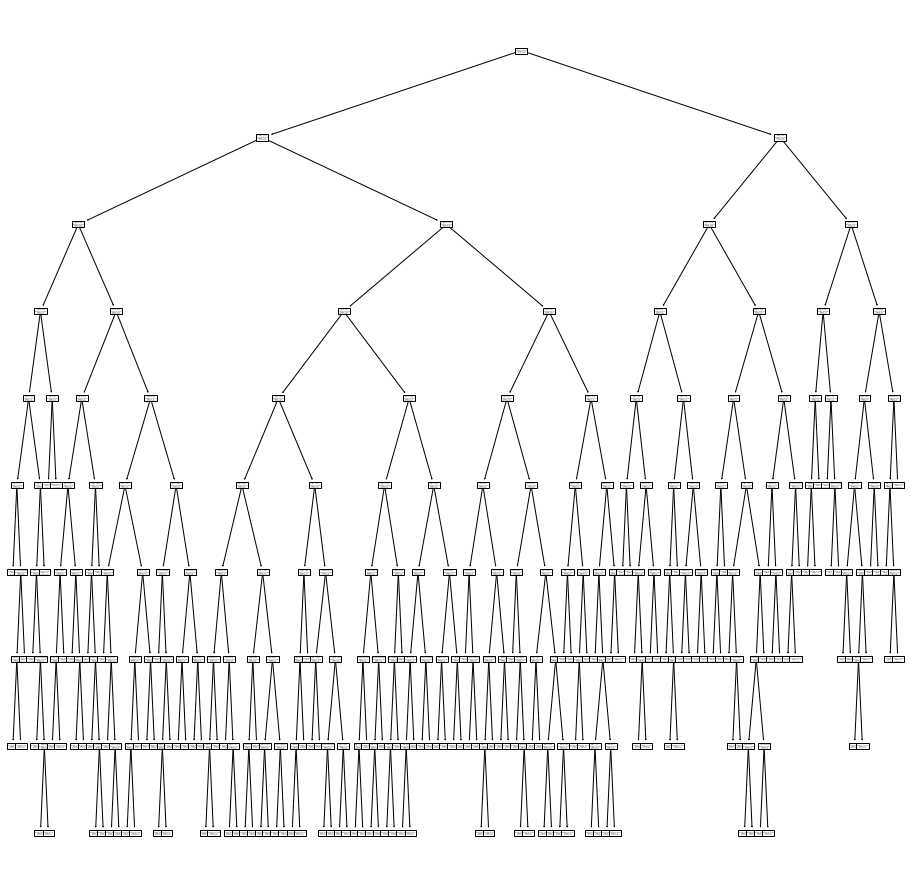

In [35]:
plt.figure(figsize=(16,16))  
plot_tree(PronosticoAD_M2, feature_names = ['Open', 'High', 'Low', 'Volume'])
plt.show()

In [36]:
ReporteAD_M2 = export_text(PronosticoAD_M2, feature_names = ['Open', 'High', 'Low', 'Volume'])
print(ReporteAD_M2)

|--- High <= 5.55
|   |--- High <= 3.79
|   |   |--- Low <= 2.67
|   |   |   |--- Low <= 2.21
|   |   |   |   |--- Low <= 1.95
|   |   |   |   |   |--- High <= 1.97
|   |   |   |   |   |   |--- value: [1.77]
|   |   |   |   |   |--- High >  1.97
|   |   |   |   |   |   |--- Volume <= 12268950.00
|   |   |   |   |   |   |   |--- Low <= 1.88
|   |   |   |   |   |   |   |   |--- value: [1.91]
|   |   |   |   |   |   |   |--- Low >  1.88
|   |   |   |   |   |   |   |   |--- value: [1.93]
|   |   |   |   |   |   |--- Volume >  12268950.00
|   |   |   |   |   |   |   |--- value: [1.99]
|   |   |   |   |--- Low >  1.95
|   |   |   |   |   |--- Low <= 2.12
|   |   |   |   |   |   |--- High <= 2.12
|   |   |   |   |   |   |   |--- value: [2.02]
|   |   |   |   |   |   |--- High >  2.12
|   |   |   |   |   |   |   |--- Volume <= 6082800.00
|   |   |   |   |   |   |   |   |--- value: [2.09]
|   |   |   |   |   |   |   |--- Volume >  6082800.00
|   |   |   |   |   |   |   |   |--- Open <= 2.12
|  

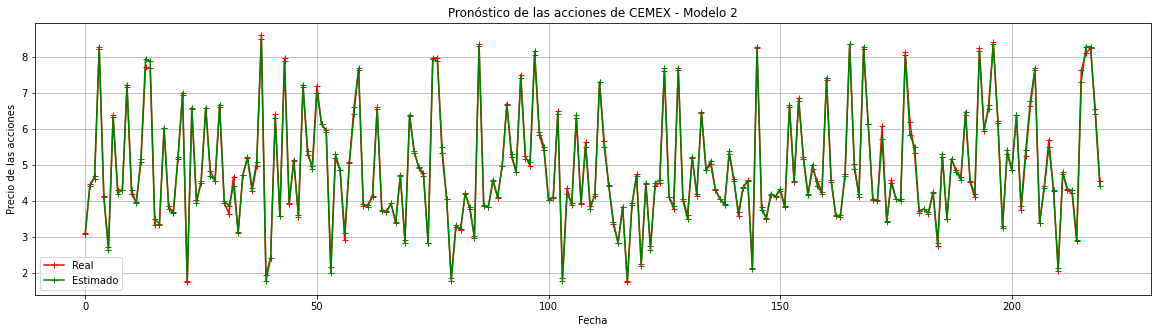

In [37]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test_AD_M2, color='red', marker='+', label='Real')
plt.plot(Y_PronosticoAD_M2, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de CEMEX - Modelo 2')
plt.grid(True)
plt.legend()
plt.show()

In [38]:
ImportanciaAD_M2 = pd.DataFrame({'Variable': list(MDatos[['Open', 'High', 'Low','Volume']]),
                            'Importancia': PronosticoAD_M2.feature_importances_}).sort_values('Importancia', ascending=False)
ImportanciaAD_M2

,Variable,Importancia
1,High,0.917980
2,Low,0.081662
0,Open,0.000253
3,Volume,0.000105


### **Nuevos pronósticos**

In [39]:
PrecioAccionAD_M2 = pd.DataFrame({'Open': [6.55],
                             'High': [6.64], 
                             'Low': [6.5],
                            'Volume': [4615500]})
PronosticoAD_M2.predict(PrecioAccionAD_M2)

C:\Users\Principal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([6.58749998])

# Aplicación del algoritmo - Bosques Aleatorios

## Modelo 1

In [40]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [41]:
Xba = np.array(MDatos[['Open',
                     'High',
                     'Low']])
pd.DataFrame(Xba)

,0,1,2
0,4.686156,4.922930,4.686156
1,4.883468,4.883468,4.755215
2,4.844005,4.903199,4.794677
3,4.893333,5.041317,4.814409
4,5.051183,5.139973,5.011720
...,...,...,...
1095,6.500000,6.770000,6.500000
1096,6.820000,6.850000,6.590000
1097,6.570000,6.700000,6.490000
1098,6.680000,6.680000,6.580000


In [42]:
Yba = np.array(MDatos[['Close']])
pd.DataFrame(Yba)

,0
0,4.903199
1,4.794678
2,4.844005
3,5.001855
4,5.139973
...,...
1095,6.740000
1096,6.630000
1097,6.660000
1098,6.610000


In [43]:
X_trainBA, X_testBA, Y_trainBA, Y_testBA = model_selection.train_test_split(Xba, Yba, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [44]:
pd.DataFrame(X_testBA)

,0,1,2
0,3.14,3.19,3.06
1,4.64,4.70,4.41
2,4.61,4.70,4.56
3,8.12,8.24,8.08
4,4.14,4.17,4.06
...,...,...,...
215,7.61,7.66,7.33
216,8.15,8.24,8.09
217,8.08,8.24,8.04
218,6.30,6.58,6.13


In [45]:
PronosticoBA = RandomForestRegressor(n_estimators=105, max_depth=8, min_samples_split=8, min_samples_leaf=4, random_state=0)
PronosticoBA.fit(X_trainBA, Y_trainBA)

C:\Users\Principal\AppData\Local\Temp\ipykernel_14420\3756475633.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  PronosticoBA.fit(X_trainBA, Y_trainBA)


RandomForestRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=105, random_state=0)

In [46]:
#Se genera el pronóstico
Y_PronosticoBA = PronosticoBA.predict(X_testBA)
pd.DataFrame(Y_PronosticoBA)

,0
0,3.129741
1,4.492699
2,4.636144
3,8.185134
4,4.112361
...,...
215,7.540310
216,8.182800
217,8.169820
218,6.366925


In [47]:
ValoresBA = pd.DataFrame(Y_testBA, Y_PronosticoBA)
ValoresBA

,0
3.129741,3.09
4.492699,4.46
4.636144,4.62
8.185134,8.20
4.112361,4.13
...,...
7.540310,7.62
8.182800,8.10
8.169820,8.23
6.366925,6.56


In [48]:
r2_score(Y_testBA, Y_PronosticoBA)

0.9979929232418585

In [49]:
print('Criterio: \n', PronosticoBA.criterion)
print('Importancia variables: \n', PronosticoBA.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_testBA, Y_PronosticoBA))
print("MSE: %.4f" % mean_squared_error(Y_testBA, Y_PronosticoBA))
print("RMSE: %.4f" % mean_squared_error(Y_testBA, Y_PronosticoBA, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_testBA, Y_PronosticoBA))


Criterio: 
 squared_error
Importancia variables: 
 [0.0114139  0.79752895 0.19105715]
MAE: 0.0538
MSE: 0.0049
RMSE: 0.0702
Score: 0.9980


#### **Conformación del modelo de pronóstico**

* Se tiene un Score de 0.9979, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.8% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 0.0049 y 0.0702 unidades del valor real, esto es, MSE y RMSE, respectivamente.

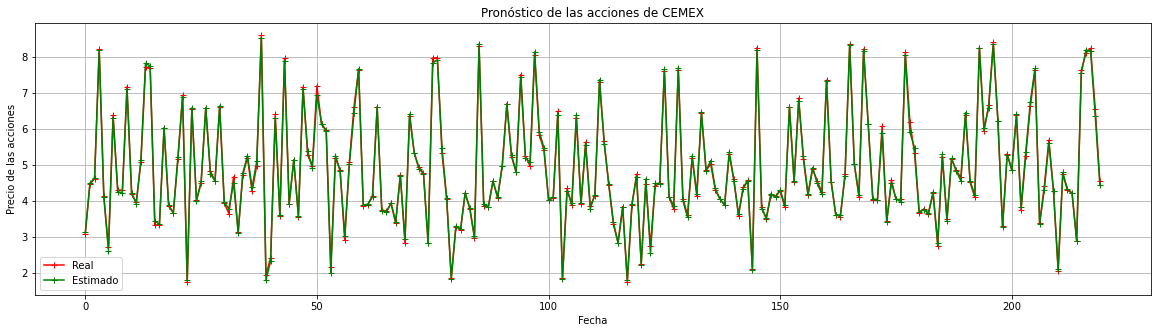

In [50]:
plt.figure(figsize=(20, 5))
plt.plot(Y_testBA, color='red', marker='+', label='Real')
plt.plot(Y_PronosticoBA, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de CEMEX')
plt.grid(True)
plt.legend()
plt.show()

In [51]:
ImportanciaBA = pd.DataFrame({'Variable': list(MDatos[['Open', 'High', 'Low']]),
                            'Importancia': PronosticoBA.feature_importances_}).sort_values('Importancia', ascending=False)
ImportanciaBA

,Variable,Importancia
1,High,0.797529
2,Low,0.191057
0,Open,0.011414


#### **Conformación del árbol**

In [52]:
Estimador = PronosticoBA.estimators_[50]
Estimador

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4,
                      min_samples_split=8, random_state=600956192)

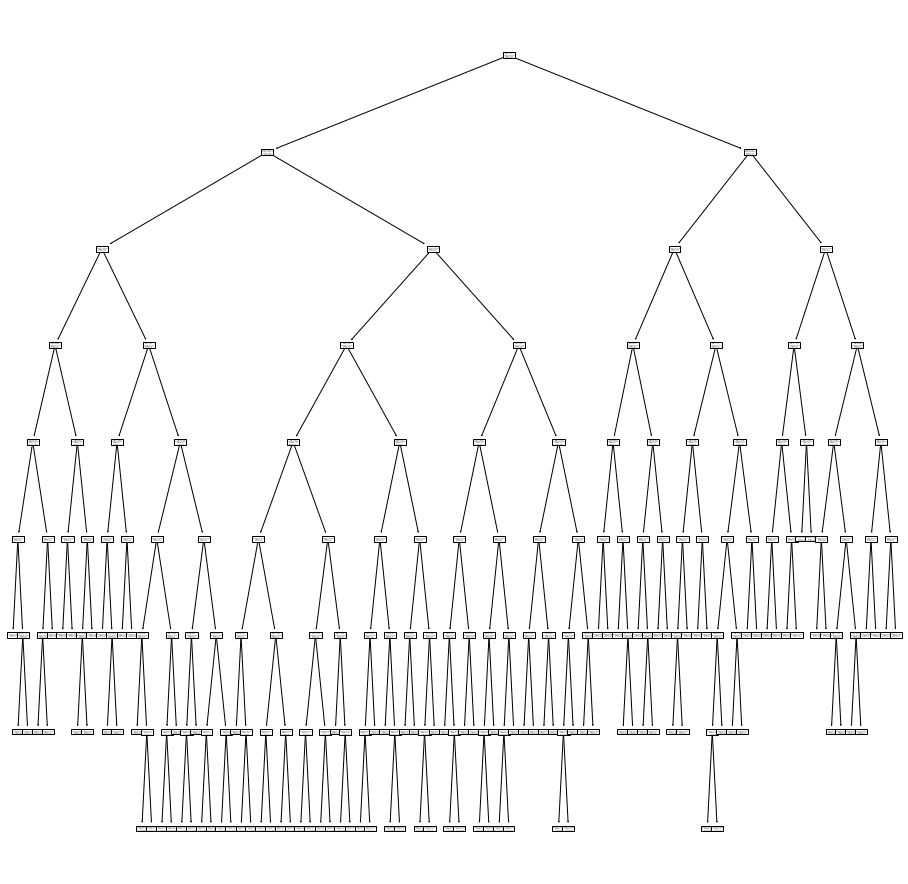

In [53]:
plt.figure(figsize=(16,16))  
plot_tree(Estimador, 
          feature_names = ['Open', 'High', 'Low'])
plt.show()

In [54]:
Reporte = export_text(Estimador, 
                      feature_names = ['Open', 'High', 'Low'])
print(Reporte)

|--- High <= 5.55
|   |--- High <= 3.80
|   |   |--- High <= 3.00
|   |   |   |--- Open <= 2.38
|   |   |   |   |--- Low <= 1.95
|   |   |   |   |   |--- High <= 1.97
|   |   |   |   |   |   |--- value: [1.77]
|   |   |   |   |   |--- High >  1.97
|   |   |   |   |   |   |--- Low <= 1.88
|   |   |   |   |   |   |   |--- value: [1.99]
|   |   |   |   |   |   |--- Low >  1.88
|   |   |   |   |   |   |   |--- value: [1.93]
|   |   |   |   |--- Low >  1.95
|   |   |   |   |   |--- Low <= 2.12
|   |   |   |   |   |   |--- Low <= 2.03
|   |   |   |   |   |   |   |--- value: [2.05]
|   |   |   |   |   |   |--- Low >  2.03
|   |   |   |   |   |   |   |--- value: [2.11]
|   |   |   |   |   |--- Low >  2.12
|   |   |   |   |   |   |--- value: [2.20]
|   |   |   |--- Open >  2.38
|   |   |   |   |--- Low <= 2.67
|   |   |   |   |   |--- Open <= 2.66
|   |   |   |   |   |   |--- value: [2.55]
|   |   |   |   |   |--- Open >  2.66
|   |   |   |   |   |   |--- value: [2.69]
|   |   |   |   |--- Low 

#### **Nuevos pronósticos**

In [55]:
PrecioAccionBA = pd.DataFrame({'Open': [6.55],
                             'High': [6.64], 
                             'Low': [6.5]})
PronosticoBA.predict(PrecioAccionBA)

C:\Users\Principal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([6.5803841])

## Modelo 2

In [56]:
MDatos = CXHist.drop(columns = ['Dividends', 'Stock Splits'])
X_BA_M2 = np.array(MDatos[['Open',
                     'High',
                     'Low',
                    'Volume']])
Y_BA_M2 = np.array(MDatos[['Close']])

In [57]:
X_train_BA_M2, X_test_BA_M2, Y_train_BA_M2, Y_test_BA_M2 = model_selection.train_test_split(X_BA_M2, Y_BA_M2, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [58]:
PronosticoBA_M2 = RandomForestRegressor(n_estimators=105, max_depth=8, min_samples_split=8, min_samples_leaf=4, random_state=0)
PronosticoBA_M2.fit(X_train_BA_M2, Y_train_BA_M2)

C:\Users\Principal\AppData\Local\Temp\ipykernel_14420\3646018998.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  PronosticoBA_M2.fit(X_train_BA_M2, Y_train_BA_M2)


RandomForestRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=105, random_state=0)

In [59]:
Y_PronosticoBA_M2 = PronosticoBA_M2.predict(X_test_BA_M2)
ValoresBA_M2 = pd.DataFrame(Y_test_BA_M2, Y_PronosticoBA_M2)
ValoresBA_M2

,0
3.127113,3.09
4.495880,4.46
4.637964,4.62
8.182255,8.20
4.109945,4.13
...,...
7.533513,7.62
8.189100,8.10
8.172387,8.23
6.370801,6.56


In [60]:
r2_score(Y_test_BA_M2, Y_PronosticoBA_M2)

0.9979679745194493

In [61]:
print('*******MODELO 2*******')
print('Criterio: \n', PronosticoBA_M2.criterion)
print('Importancia variables: \n', PronosticoBA_M2.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test_BA_M2, Y_PronosticoBA_M2))
print("MSE: %.4f" % mean_squared_error(Y_test_BA_M2, Y_PronosticoBA_M2))
print("RMSE: %.4f" % mean_squared_error(Y_test_BA_M2, Y_PronosticoBA_M2, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test_BA_M2, Y_PronosticoBA_M2))

*******MODELO 2*******
Criterio: 
 squared_error
Importancia variables: 
 [1.18646191e-02 7.93732449e-01 1.94303553e-01 9.93785476e-05]
MAE: 0.0541
MSE: 0.0050
RMSE: 0.0706
Score: 0.9980


#### **Conformación del modelo de pronóstico**

* Se tiene un Score de 0.9979, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.8% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 0.005 y 0.0706 unidades del valor real, esto es, MSE y RMSE, respectivamente.

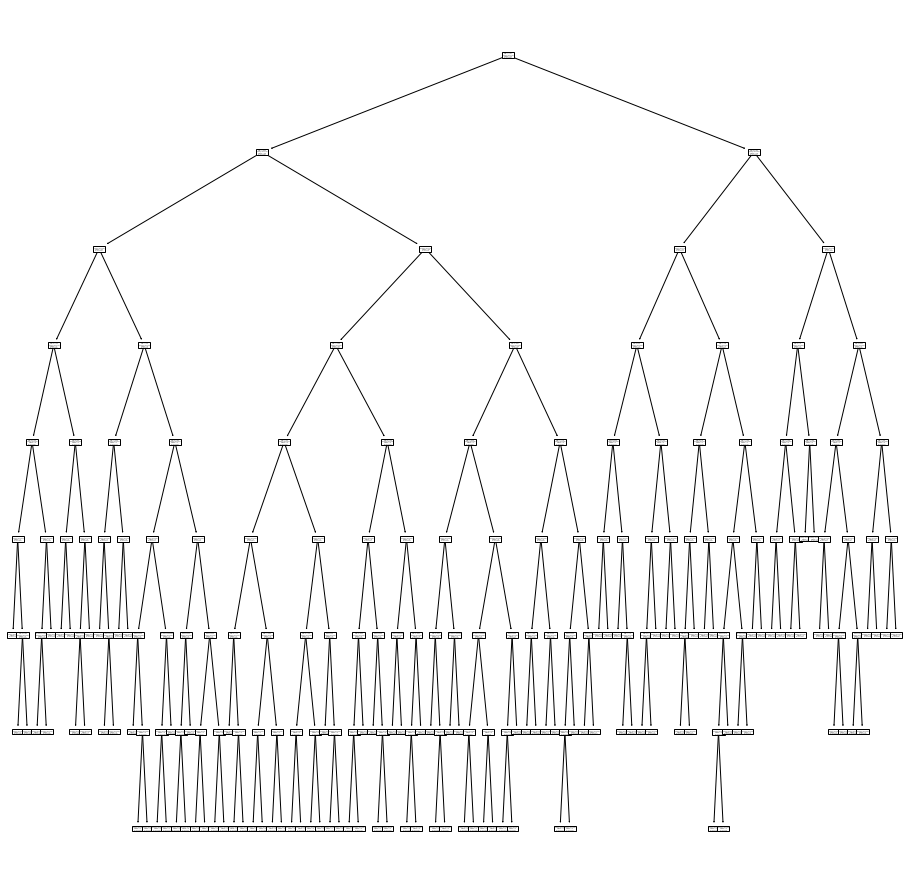

In [62]:
EstimadorBA_M2 = PronosticoBA_M2.estimators_[50]
plt.figure(figsize=(16,16))  
plot_tree(EstimadorBA_M2, feature_names = ['Open', 'High', 'Low', 'Volume'])
plt.show()

In [63]:
EstimadorBA_M2 = PronosticoBA_M2.estimators_[50]
ReporteBA_M2 = export_text(EstimadorBA_M2, feature_names = ['Open', 'High', 'Low', 'Volume'])
print(ReporteBA_M2)

|--- High <= 5.55
|   |--- High <= 3.80
|   |   |--- High <= 3.00
|   |   |   |--- Low <= 2.25
|   |   |   |   |--- Low <= 1.95
|   |   |   |   |   |--- High <= 1.97
|   |   |   |   |   |   |--- value: [1.77]
|   |   |   |   |   |--- High >  1.97
|   |   |   |   |   |   |--- Low <= 1.88
|   |   |   |   |   |   |   |--- value: [1.99]
|   |   |   |   |   |   |--- Low >  1.88
|   |   |   |   |   |   |   |--- value: [1.93]
|   |   |   |   |--- Low >  1.95
|   |   |   |   |   |--- Low <= 2.12
|   |   |   |   |   |   |--- Volume <= 7185050.00
|   |   |   |   |   |   |   |--- value: [2.12]
|   |   |   |   |   |   |--- Volume >  7185050.00
|   |   |   |   |   |   |   |--- value: [2.05]
|   |   |   |   |   |--- Low >  2.12
|   |   |   |   |   |   |--- value: [2.20]
|   |   |   |--- Low >  2.25
|   |   |   |   |--- Low <= 2.67
|   |   |   |   |   |--- Open <= 2.66
|   |   |   |   |   |   |--- value: [2.55]
|   |   |   |   |   |--- Open >  2.66
|   |   |   |   |   |   |--- value: [2.69]
|   |   |

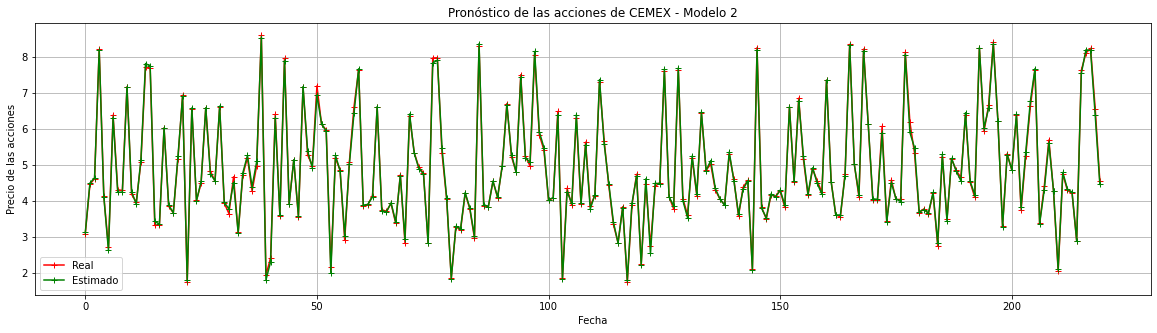

In [64]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test_BA_M2, color='red', marker='+', label='Real')
plt.plot(Y_PronosticoBA_M2, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de CEMEX - Modelo 2')
plt.grid(True)
plt.legend()
plt.show()

In [65]:
ImportanciaBA_M2 = pd.DataFrame({'Variable': list(MDatos[['Open', 'High', 'Low', 'Volume']]),
                            'Importancia': PronosticoBA_M2.feature_importances_}).sort_values('Importancia', ascending=False)
ImportanciaBA_M2

,Variable,Importancia
1,High,0.793732
2,Low,0.194304
0,Open,0.011865
3,Volume,0.000099


### **Nuevos pronósticos**

In [66]:
PrecioAccionBA_M2 = pd.DataFrame({'Open': [6.55],
                             'High': [6.64], 
                             'Low': [6.5],
                            'Volume': [4615500]})
PronosticoBA_M2.predict(PrecioAccionBA_M2)

C:\Users\Principal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([6.57916726])

# Comparación

## Árbol de Decisión - Modelo 1 y 2

In [67]:
ComparacionAD = pd.DataFrame({'Modelo': ['Solo', 'Con "Volume"'],
                            'R^2 "Score"': [r2_score(Y_test, Y_Pronostico),r2_score(Y_test_AD_M2, Y_PronosticoAD_M2)],
                             'MAE ': [mean_absolute_error(Y_test, Y_Pronostico),  mean_absolute_error(Y_test_AD_M2, Y_PronosticoAD_M2)],
                             'MSE': [mean_squared_error(Y_test, Y_Pronostico),  mean_squared_error(Y_test_AD_M2, Y_PronosticoAD_M2)],
                             'RMSE': [mean_squared_error(Y_test, Y_Pronostico, squared=False),  mean_squared_error(Y_test_AD_M2, Y_PronosticoAD_M2, squared=False)] }).sort_values('R^2 "Score"', ascending=False)
ComparacionAD

,Modelo,"R^2 ""Score""",MAE,MSE,RMSE
0,Solo,0.996819,0.065840,0.007805,0.088348
1,"Con ""Volume""",0.996766,0.066549,0.007934,0.089071


## Bosques Aleatorios - Modelo 1 y 2

In [68]:
ComparacionBA = pd.DataFrame({'Modelo': ['Solo', 'Con "Volume"'],
                            'R^2 "Score"': [r2_score(Y_testBA, Y_PronosticoBA),r2_score(Y_test_AD_M2, Y_PronosticoBA_M2)],
                             'MAE ': [mean_absolute_error(Y_testBA, Y_PronosticoBA),  mean_absolute_error(Y_test_BA_M2, Y_PronosticoBA_M2)],
                             'MSE': [mean_squared_error(Y_testBA, Y_PronosticoBA),  mean_squared_error(Y_test_BA_M2, Y_PronosticoBA_M2)],
                             'RMSE': [mean_squared_error(Y_testBA, Y_PronosticoBA, squared=False),  mean_squared_error(Y_test_BA_M2, Y_PronosticoBA_M2, squared=False)] }).sort_values('R^2 "Score"', ascending=False)
ComparacionBA

,Modelo,"R^2 ""Score""",MAE,MSE,RMSE
0,Solo,0.997993,0.053850,0.004924,0.070172
1,"Con ""Volume""",0.997968,0.054075,0.004985,0.070607


In [69]:
ComparacionTot = pd.DataFrame({ 'Modelo & Algoritmo': ['Solo - AD', 'Con "Volume" - AD', 'Solo - BA', 'Con "Volume" - BA'],
                            'R^2 "Score"': [r2_score(Y_test, Y_Pronostico),r2_score(Y_test_AD_M2, Y_PronosticoAD_M2),r2_score(Y_testBA, Y_PronosticoBA),r2_score(Y_test_AD_M2, Y_PronosticoBA_M2)], 
                            'MAE ': [mean_absolute_error(Y_test, Y_Pronostico),  mean_absolute_error(Y_test_AD_M2, Y_PronosticoAD_M2), mean_absolute_error(Y_testBA, Y_PronosticoBA),  mean_absolute_error(Y_test_BA_M2, Y_PronosticoBA_M2)],
                            'MSE': [mean_squared_error(Y_test, Y_Pronostico),  mean_squared_error(Y_test_AD_M2, Y_PronosticoAD_M2) ,mean_squared_error(Y_testBA, Y_PronosticoBA),  mean_squared_error(Y_test_BA_M2, Y_PronosticoBA_M2)],  
                            'RMSE': [mean_squared_error(Y_test, Y_Pronostico, squared=False), mean_squared_error(Y_test_AD_M2, Y_PronosticoAD_M2,squared=False), mean_squared_error(Y_testBA, Y_PronosticoBA, squared=False),  mean_squared_error(Y_test_BA_M2, Y_PronosticoBA_M2, squared=False)] }).sort_values('R^2 "Score"', ascending=False)
ComparacionTot

,Modelo & Algoritmo,"R^2 ""Score""",MAE,MSE,RMSE
2,Solo - BA,0.997993,0.053850,0.004924,0.070172
3,"Con ""Volume"" - BA",0.997968,0.054075,0.004985,0.070607
0,Solo - AD,0.996819,0.065840,0.007805,0.088348
1,"Con ""Volume"" - AD",0.996766,0.066549,0.007934,0.089071
